In [71]:
### author : hyungil ed kim
### date : 21.03.22

### data science in python
### 1. linear regression _ 2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# pandas data import
df = pd.read_csv('Dataset_2.csv', header = None)
df.columns = ['size','bedrooms','price']


In [95]:
# data scaling
df.scaled = pd.DataFrame(df)

# dataframe apply 함수 사용
def mean_norm(df):
    return df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df.scaled = mean_norm(df.scaled)
df.scaled.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [66]:
# bias항 생성
bias = pd.DataFrame({"const":np.repeat(1,df.shape[0])})
data = pd.concat((df.scaled,bias),axis=1)
data.head()

,size,bedrooms,price,const
0,0.130010,-0.223675,0.475747,1
1,-0.504190,-0.223675,-0.084074,1
2,0.502476,-0.223675,0.228626,1
3,-0.735723,-1.537767,-0.867025,1
4,1.257476,1.090417,1.595389,1


In [102]:
# price값:dependent variable, 나머지:independent variable
featureColumns = list(data.columns.difference(["price"]))
X = data[featureColumns]
y = data.price


# w^{\ast} = (X^T X)^{-1} X^T y
# RSS 수식 계산

# 선형회귀 계수 수식 직접 계산
tmp1 = np.dot(X.T,X)
theta = np.dot(np.linalg.inv(tmp1),np.dot(X.T,y))
print(X.head())
print(theta)



   bedrooms  const      size
0 -0.223675      1  0.130010
1 -0.223675      1 -0.504190
2 -0.223675      1  0.502476
3 -1.537767      1 -0.735723
4  1.090417      1  1.257476
[-5.31788197e-02 -1.04897906e-16  8.84765988e-01]


In [158]:
# cost function
def costFunc(X, y, theta):
    z = (np.dot(X,theta)-y)**2
    return (sum(z)/(2*X.shape[0]))

def gradDescent(X, y, theta, alpha, iters):
    gd = []
    cost = []
    for i in range(iters):
        z = np.repeat(0, X.shape[1])
        for j in range(X.shape[1]):
            for k in range(X.shape[0]):
                z[j] += ((np.dot(X.iloc[k,],theta)-y[k])*X.iloc[k,j])
        tmp = theta -(alpha/X.shape[0])*(z)
        theta = tmp
        cost.append(costFunc(X,y,theta))
    
    return theta, cost



In [149]:
theta = np.repeat(0, X.shape[1])
result = costFunc(X,y,theta)
round(result,2)

0.49

In [159]:
# gradient descent 계산
iters, alpha = 3000, 0.01
theta = np.repeat(0, X.shape[1])
thetaResult, costResult = gradDescent(X, y, theta, alpha, iters)
print(thetaResult)

[ 0.01361702 -0.01361702  0.40170213]


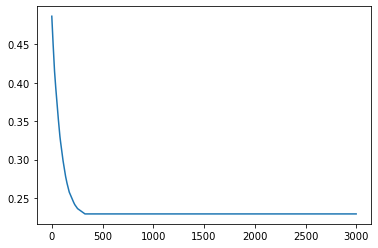

In [161]:

n = np.arange(iters)
plt.plot(n, costResult)
plt.show()

In [142]:
# Multi-variable Linear Regression 학습
import statsmodels.api as sm
import statsmodels.formula.api as smf

# OLS(Ordinary Least Squares) 잔차제곱합을 최소화 하는 계산식
res = smf.ols(formula='price ~size+bedrooms', data=data).fit()
# OLS 결과값 확인
res.params

# 수식으로 구한 theta의 계수 값들과 OLS를 통한 계산식의 결과과 유사함을 알수 있다.

Intercept   -9.020562e-17
size         8.847660e-01
bedrooms    -5.317882e-02
dtype: float64

In [103]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values,i)
                    for i in range(data.shape[1])]
vif["features"] = data.columns
print(vif)

   VIF Factor  features
0    4.388071      size
1    1.467388  bedrooms
2    3.744547     price
3    1.000000     const
